<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/Notebooks/EDA_dataviz_application_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the applied session in data visualization for Exploratory Data Analysis (EDA) in `Python`.

![](https://miro.medium.com/max/674/1*Pf07M2ljV47ObDfcyiQolA.png)

Python does have a number of different visualization libraries. While there have been attempts to translate and use the [grammar of graphics in python](https://github.com/has2k1/plotnine), it never really took of. 

In this tutorial we are going to look at Seaborn, a package that works with the rather "complex" matplotlib library and produces nice visualizations in a "pythonic" notation.



# Application: the `BIXI Bikeshare Data` dataset

Lets take a step back and zoom a bit into different forms of visualization. We will now take a look at the `BIXI Bikeshare Data`, covering 500k bike-rides in the BIXI bike-sharing system in Montreal.



In [11]:
# load packages
import pandas as pd
import seaborn as sns
import altair as alt 

sns.set(color_codes=True)

import matplotlib.pyplot as plt



In [3]:
# load the data
bike = pd.read_parquet('https://SDS-AAU.github.io/SDS-master/00_data/bikes_montreal.pq')

# Since the dataset is rather big 500k x 12 vars, we are using the parquet format
# with built in compression (file size is at 9mb, while full data is at 40mb)

In [4]:
# Let's check out the data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          500000 non-null  datetime64[ns]
 1   start_station_code  500000 non-null  int32         
 2   end_date            500000 non-null  datetime64[ns]
 3   end_station_code    500000 non-null  int32         
 4   duration_sec        500000 non-null  int32         
 5   start_day           500000 non-null  object        
 6   start_dow           500000 non-null  object        
 7   weekday             500000 non-null  object        
 8   start_hod           500000 non-null  float64       
 9   start_mon           500000 non-null  float64       
 10  start_wk            500000 non-null  float64       
 11  membership          500000 non-null  object        
dtypes: datetime64[ns](2), float64(3), int32(3), object(4)
memory usage: 40.1+ MB


In [5]:
bike.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,start_day,start_dow,weekday,start_hod,start_mon,start_wk,membership
0,2017-08-16 12:10:00,6213,2017-08-16 12:30:00,6391,1237,2017-08-16,Wed,workweek,12.0,8.0,33.0,member
1,2017-06-25 23:22:00,6393,2017-06-25 23:27:00,6394,294,2017-06-25,Sun,weekend,23.0,6.0,26.0,non-member
2,2017-08-10 17:26:00,6114,2017-08-10 17:29:00,6113,156,2017-08-10,Thu,workweek,17.0,8.0,32.0,member
3,2017-08-17 15:25:00,6044,2017-08-17 15:32:00,6015,419,2017-08-17,Thu,workweek,15.0,8.0,33.0,member
4,2017-10-12 10:39:00,6389,2017-10-12 10:49:00,6262,601,2017-10-12,Thu,workweek,10.0,10.0,41.0,member



We see here a number of different variable types present, namely:

* Continuous variables
* Categorical variables
* Temporal variables


## Basic visualization of variable types

### Summaries of One Variable: Continuous

When attempting to summarize a single variable, histograms and density distributions are often the visualization of choice.



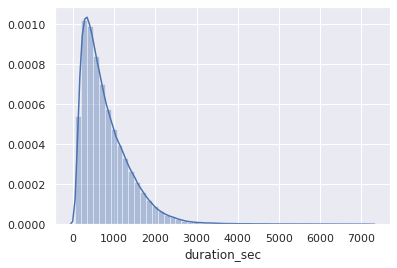

In [6]:
# this is the basic Seaborn version of a histogram (with a density curve by default)

sns.distplot(bike.duration_sec)

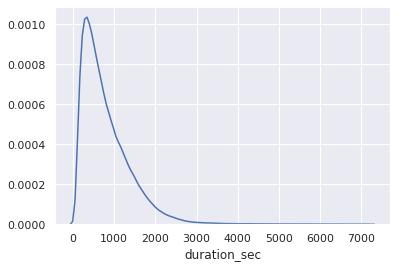

In [7]:
# only plot the probability density function, we can disable the hist argument

sns.distplot(bike.duration_sec, hist=False, kde=True)


Note the distribution appears right-skewed, since we have some outliers of very long bike rides. Adding a log-scale on the x-axis might help to reduce their impact on the visualization.




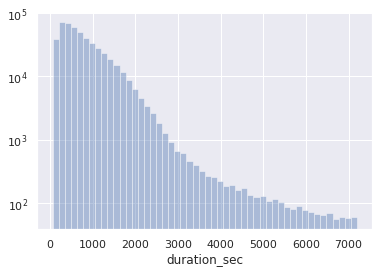

In [8]:
sns.distplot(bike.duration_sec, kde=False, hist_kws={'log':True})


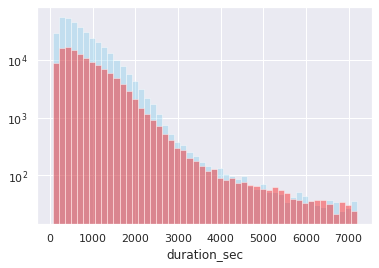

In [22]:
# Ikke lige så elegant som i R

sns.distplot(bike[bike.weekday == "workweek"].duration_sec , color="skyblue", label="workweek", kde=False, hist_kws={'log':True})
sns.distplot(bike[bike.weekday == "weekend"].duration_sec , color="red", label="weekend", kde=False, hist_kws={'log':True})


### Summaries of One Variable: Discrete

To do the same for a discrete variable, we would start with a simple barplot. BUT: Here the way to go would be using a count-plot. Barplots require X and Y values.



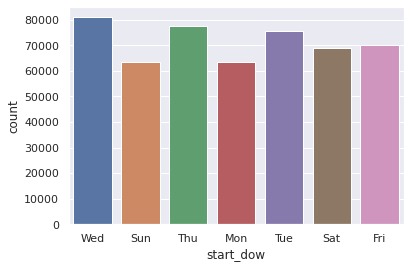

In [24]:
sns.countplot(bike.start_dow)

That order is not too smart...and we need to intervene

In [25]:
bike.start_dow.unique()

array(['Wed', 'Sun', 'Thu', 'Mon', 'Tue', 'Sat', 'Fri'], dtype=object)

In [28]:
#manual labor
ordered_days = ['Mon','Tue' ,'Wed','Thu','Fri','Sat','Sun']

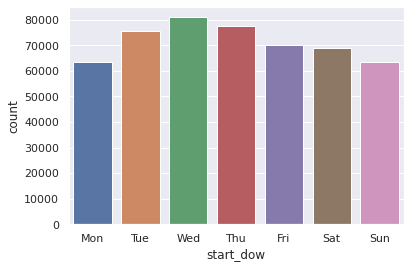

In [29]:
sns.countplot(bike.start_dow, order=ordered_days)

We could also use the membership to bring more info into the plot. The `hue` argument can be used to visualise differences between groups over the days.

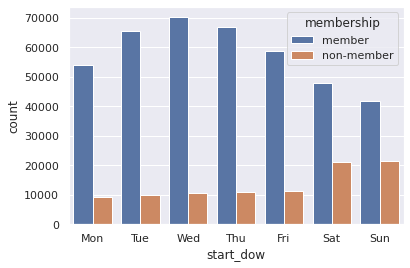

In [30]:
sns.countplot(bike.start_dow, order=ordered_days, hue = bike.membership)

### Summaries of One Variable: Temporal

A temporal variable can also be visualized as a line-plot

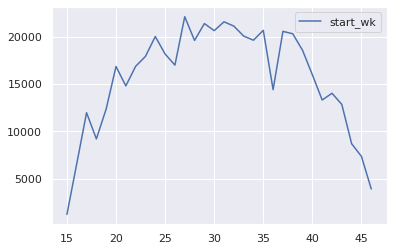

In [51]:
# line-plots are not made to show counts but we can quickly fix that with pandas

to_plot = pd.DataFrame(bike.start_wk.value_counts()) # counting up within pandas and making a DF

sns.lineplot(data = to_plot)



## Summarizing multiple variablea jointly

Ok, that was rather easy. However, the insights gained so far are pretty little. To tease out interesting pattern in our data, it might not be enough to only look at one variable at a time. 

Lets look at some examples of adding more information:

First, we could take a look at the number of daily rides with  workweek / weekend days colored differently.



[(736434.0, 736648.0)]

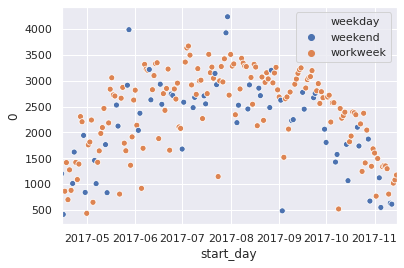

In [100]:
# in this case we can just use groupby because a date is always linked to a specific weekday
to_plot = bike.groupby(["start_day",'weekday']).size().reset_index() # to get the frame in order to plot

plot = sns.scatterplot(data=to_plot, y = 0, x = 'start_day', hue = 'weekday', markers=True)


# for some reason searborn needs X-axis limits explicitly... :-(
plot.set(xlim = (to_plot.start_day.min(), to_plot.start_day.max()))

In [101]:
bike.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,start_day,start_dow,weekday,start_hod,start_mon,start_wk,membership
0,2017-08-16 12:10:00,6213,2017-08-16 12:30:00,6391,1237,2017-08-16,Wed,workweek,12.0,8.0,33.0,member
1,2017-06-25 23:22:00,6393,2017-06-25 23:27:00,6394,294,2017-06-25,Sun,weekend,23.0,6.0,26.0,non-member
2,2017-08-10 17:26:00,6114,2017-08-10 17:29:00,6113,156,2017-08-10,Thu,workweek,17.0,8.0,32.0,member
3,2017-08-17 15:25:00,6044,2017-08-17 15:32:00,6015,419,2017-08-17,Thu,workweek,15.0,8.0,33.0,member
4,2017-10-12 10:39:00,6389,2017-10-12 10:49:00,6262,601,2017-10-12,Thu,workweek,10.0,10.0,41.0,member



Now let's look at how rides are distributed according to the time of day. Let's make a summary plot of weekly ride counts faceted by start hour of day and broken down by workweek/weekend. Here, we will use the `FacetGrid`

In [103]:
to_plot = bike.groupby(["start_wk",'start_hod', 'weekday']).size().reset_index()

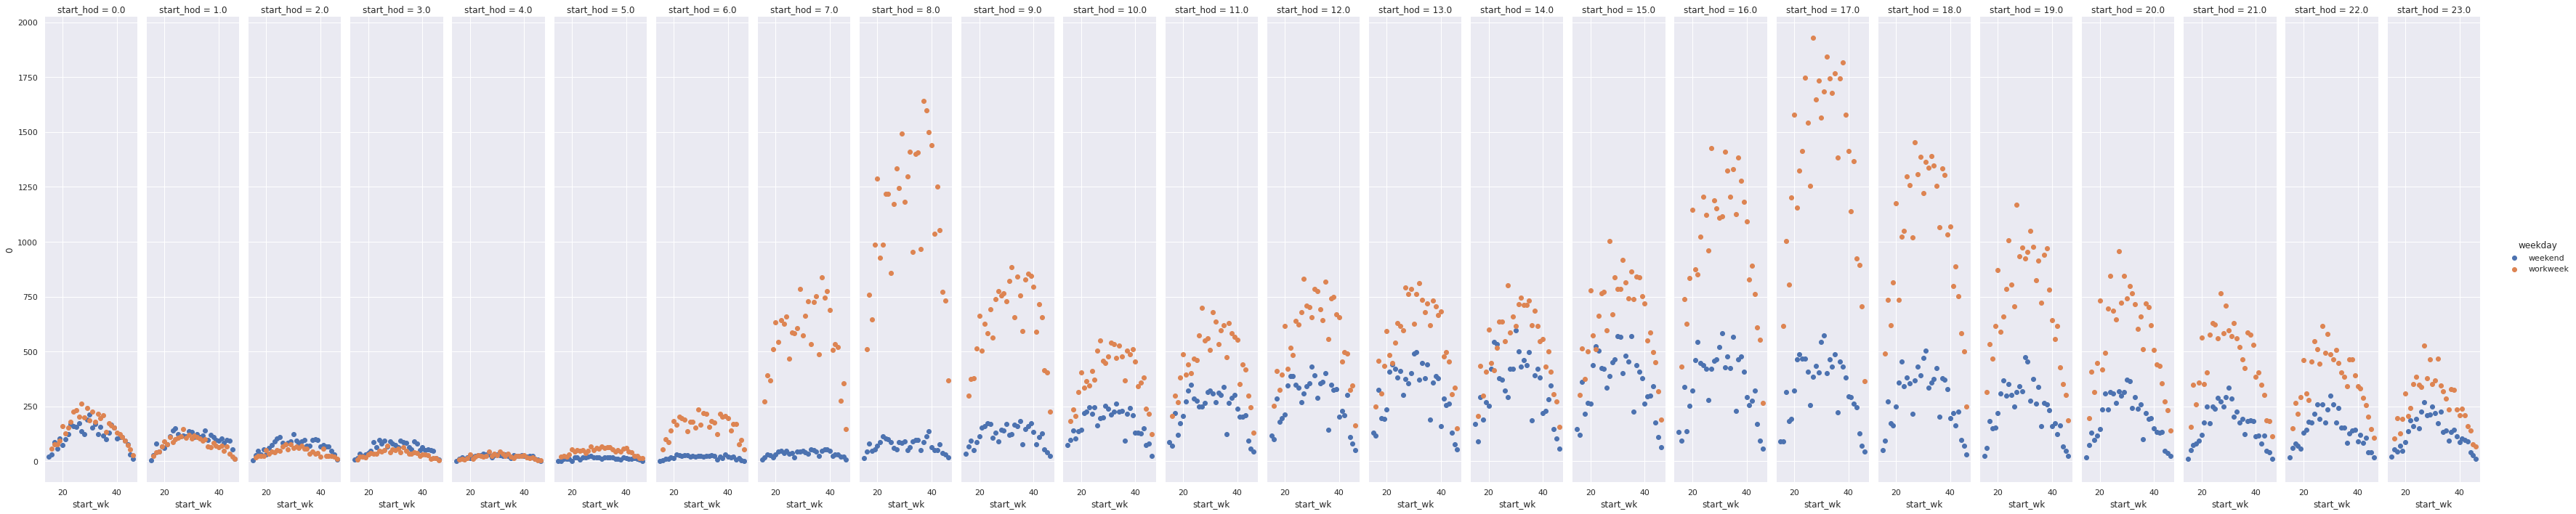

In [114]:
g = sns.FacetGrid(to_plot, col="start_hod", hue="weekday", height=10, aspect=.2)
g = (g.map(plt.scatter, 'start_wk', 0)
     .add_legend())


sns.despine(left=True, bottom=True)


Expanding on the previous plot, let's add one more variable into our summary, adding a facet dimension for whether or not the rider is a member of BIXI.



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


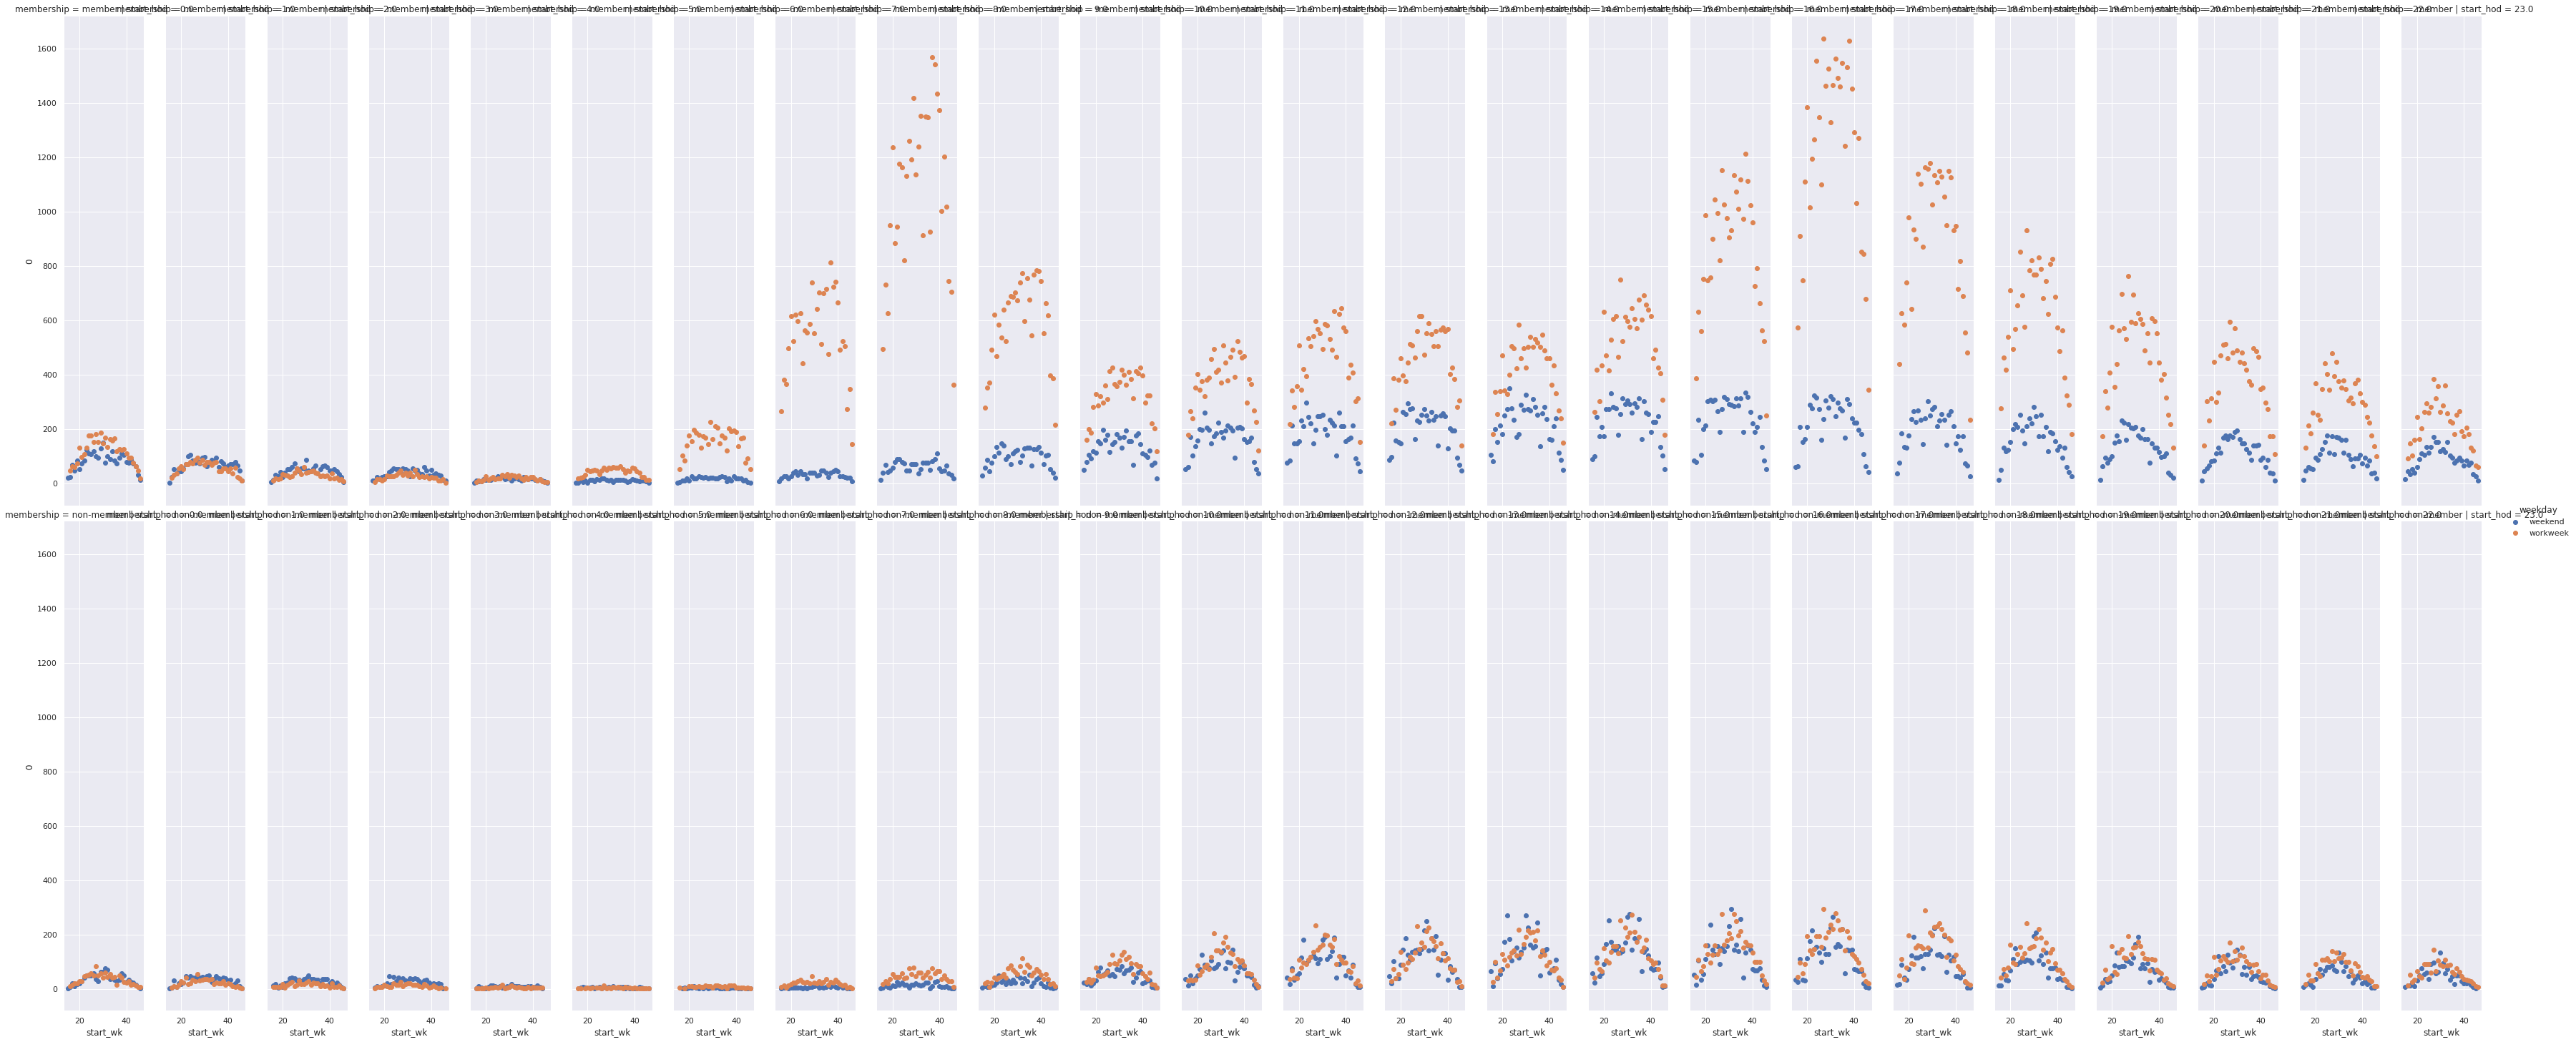

In [116]:
to_plot = bike.groupby(["start_wk",'start_hod', 'weekday', 'membership']).size().reset_index()
g = sns.FacetGrid(to_plot, col="start_hod", row='membership', hue="weekday", height=10, aspect=.2)
g = (g.map(plt.scatter, 'start_wk', 0)
     .add_legend())


sns.despine(left=True, bottom=True)

Let's now look at the number of rides vs. hour for each day. To start, we'll create a summary dataset for the first full month in the dataset (May) and look at it.

In [117]:
to_plot = bike[bike.start_mon == 5].groupby(["start_day",'start_hod', 'membership']).size().reset_index()

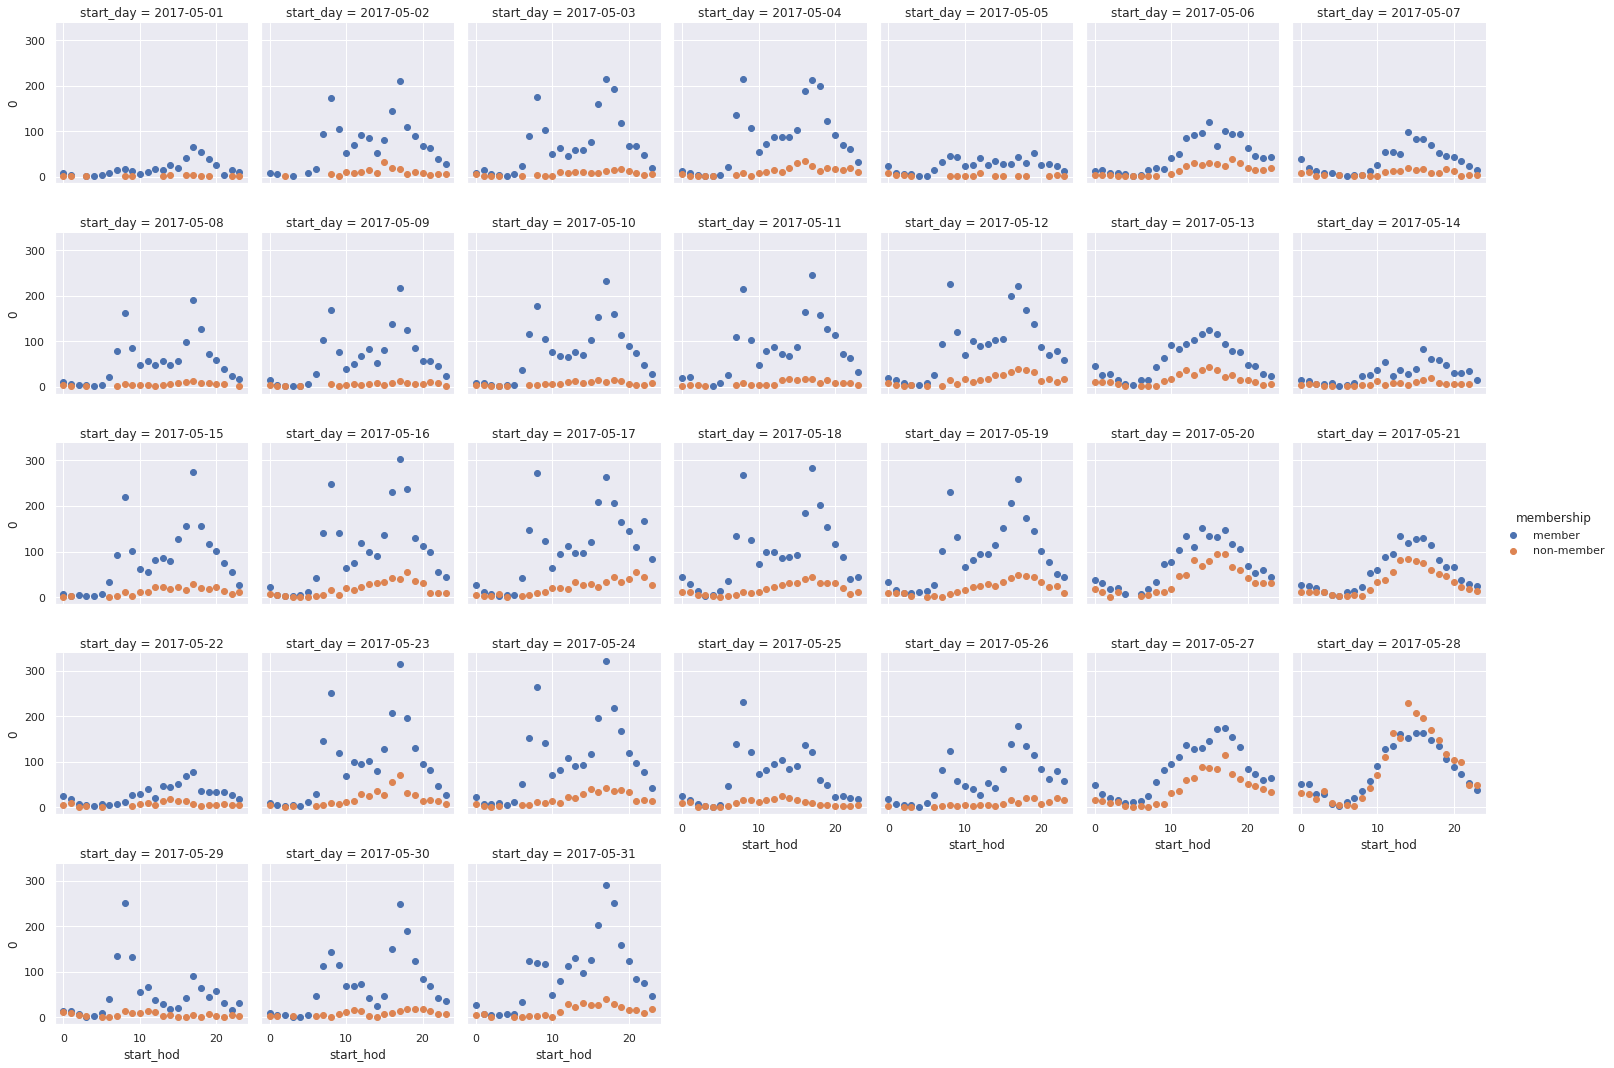

In [120]:
g = sns.FacetGrid(to_plot, col="start_day", col_wrap=7,  hue="membership")
g = (g.map(plt.scatter, 'start_hod', 0)
     .add_legend())